## dropout从零开始实现

In [1]:
import torch
from torch import nn
from d2l import torch as d2l

In [6]:
def dropout_layer(X, dropout):
    mask = (torch.rand(X.shape) > dropout).float()
    if dropout == 1:
        return torch.zeros_like(X)
    return mask * X / (1 - dropout)

In [9]:
X = torch.arange(0,10)
dropout_layer(X, 0)
dropout_layer(X, 1)
dropout_layer(X, 0.5)

tensor([ 0.,  2.,  0.,  0.,  0.,  0., 12.,  0., 16.,  0.])

In [14]:
num_inputs, num_outputs, num_hiddens1, num_hiddens2 = 784, 10, 256, 256
dropout1, dropout2 = 0.2, 0.5

In [17]:
class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs, num_hiddens1, num_hiddens2, is_training = True):
        super(Net, self).__init__()
        self.num_inputs = num_inputs
        self.num_outputs = num_outputs
        self.num_hiddens1 = num_hiddens1
        self.num_hiddens2 = num_hiddens2
        self.is_training = is_training
        
        self.flatten = nn.Flatten()
        self.linH1 = nn.Linear(num_inputs, num_hiddens1)
        self.Relu = nn.ReLU()
        self.linH2 = nn.Linear(num_hiddens1, num_hiddens2)
        self.linOutput = nn.Linear(num_hiddens2, num_outputs)
    def forward(self, X):
        X_flatten = self.flatten(X)
        H1_output = self.Relu(self.linH1(X_flatten))
        H1_dropout_output = dropout_layer(H1_output, dropout1)
        H2_output = self.Relu(self.linH2(H1_dropout_output))
        H2_dropout_output = dropout_layer(H2_output, dropout2)
        return self.linOutput(H2_dropout_output)

In [18]:
net = Net(num_inputs, num_outputs, num_hiddens1, num_hiddens2)

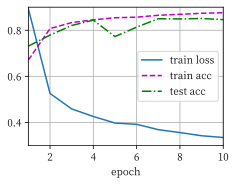

In [19]:
num_epochs, lr, batch_size = 10, 0.5, 256
loss = nn.CrossEntropyLoss(reduction='none')
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

## dropout简单实现

In [23]:
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(num_outputs, num_hiddens1),
    nn.ReLU(),
    nn.Dropout(dropout1),
    nn.Linear(num_hiddens1, num_hiddens2),
    nn.ReLU(),
    nn.Dropout(dropout2),
    nn.Linear(num_hiddens2, num_outputs)
)

def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)

net.apply(init_weights);

RuntimeError: mat1 and mat2 shapes cannot be multiplied (256x784 and 10x256)

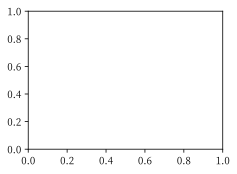

In [24]:
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)